# GIS introduction with geopandas (vector data)
based on scipy2018-geospatial

## goals of the tutorial
- the vector data and ESRI Shapefile
- the geodataframe in geopandas
- spatial projection

**based on the open data of:**
- [ISTAT](https://www.istat.it/it/archivio/222527) Italian National Institute of Statistic 

### requirements
- python knowledge
- pandas

### status 
*"The Earth isn't flat!!!"*

---

## install geopandas

In [ ]:
import os
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.1
  import geopandas as gpd
if gpd.__version__ != "0.10.1":
  !pip install -U geopandas==0.10.1
  import geopandas as gpd

---

# Let's start with GeoPandas

## Importing geospatial data

geopandas supports all the vector format offered by the project gdal/ogr

https://www.gdal.org/ogr_formats.html 

we will play with the geospatial data offered by ISTAT

https://www.istat.it/it/archivio/104317


### administrative borders
https://www.istat.it/it/archivio/222527

the big zip with everything - year 2021

https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/Limiti01012021_g.zip

---
#### download and investigate the data

In [3]:
if not os.path.exists('Limiti01012021_g'):
    # download the data
    import requests, zipfile, io
    zip_file_url = 'https://www.istat.it/storage/cartografia/confini_amministrativi/generalizzati/Limiti01012021_g.zip'
    #request the file
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    #unzip the file
    z.extractall()


Directory listening

In [4]:
os.listdir(".")

['ciapa.geojson',
 '02_Spatial_relationships_and_operations.ipynb',
 '01_GIS_introduction_with_geopandas.ipynb',
 'Limiti01012021_g']

In [5]:
os.listdir('Limiti01012021_g')

['Reg01012021_g', 'Com01012021_g', 'ProvCM01012021_g', 'RipGeo01012021_g']

Limiti01012021_g => main folder with all the administrative borders of Italy in 2021 generalized version
- ProvCM01012021_g => folder with the provinces of Italy
- Reg01012021_g => folder with the regions of Italy
- RipGeo01012021_g => folder with the macro-regions of Italy
- Com01012021_g => folder with the municipalities of Italy


#### Inspect the the macro regions


In [6]:
#look to the data inside the macro regions
os.chdir('Limiti01012021_g')
os.chdir('RipGeo01012021_g')

In [7]:
#show only the files
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

RipGeo01012021_g_WGS84.shp
RipGeo01012021_g_WGS84.prj
RipGeo01012021_g_WGS84.dbf
RipGeo01012021_g_WGS84.shx


### ESRI Shapefile

this is a *ESRI Shapefile* (an old but common used format for the geospatial vector data)

The format is proprietary and some format specifications are public.
A "ESRI Shapefile" is a collection of different files with the same name and different extensions.

The public specifications are for the extensions:

| extension | meaning       | content of the file                                                  |
| --------- | ------------- | -------------------------------------------------------------------- |
| .shp      | shape         | the geometries (point, line, polygon)                                |
| .dbf      | database file | the attributes to associate with the geometries                      |
| .shx      | shape indices | the indices to join the geometries with the attributes               |
| .prj      | projection    | the rule to understand the kind of projection used by the geometries |

To manage the data are _necessary_ 3 files (*.shp, .shx, and .dbf*), however the *.prj* file is crucial to analyze the data togheter with other sources.

It's possibile find other kind of files

more informations are here

https://www.esri.com/library/whitepapers/pdfs/shapefile.pdf


**read the file with gepandas**

In [8]:
# read the file
macroregions=gpd.read_file('RipGeo01012021_g_WGS84.shp')

In [9]:
type(macroregions)

geopandas.geodataframe.GeoDataFrame

### GeoDataframe

geopandas transform everything in a [GeoDataFrame](http://geopandas.org/data_structures.html#geodataframe).

a geodataframe is a pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with the column "geometry" and special geospatial methods

In [10]:
macroregions

,COD_RIP,DEN_RIP,Shape_Leng,Shape_Area,geometry
0,1,Nord-Ovest,2.329777e+06,5.792967e+10,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
1,2,Nord-Est,2.322834e+06,6.232776e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
2,3,Centro,2.019864e+06,5.807528e+10,"MULTIPOLYGON (((875952.995 4524692.050, 875769..."
3,4,Sud,2.513894e+06,7.377826e+10,"MULTIPOLYGON (((1083358.846 4416348.741, 10833..."
4,5,Isole,2.773276e+06,4.991839e+10,"MULTIPOLYGON (((822886.611 3935355.889, 822871..."


Eg.
calculate the area of each geometry

In [11]:
macroregions.geometry.area

0    5.792967e+10
1    6.232776e+10
2    5.807528e+10
3    7.377826e+10
4    4.991839e+10
dtype: float64

**you can plot it**

<AxesSubplot:>

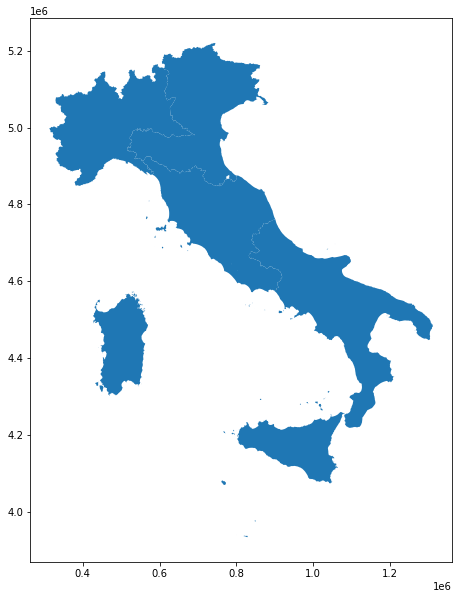

In [12]:
macroregions.plot(figsize=(10,10))

... and use the **classic methods of the pandas DataFrame.**

Eg.

extract a (geo)DataFrame by filter from an attribute

In [13]:
isole = macroregions[macroregions['DEN_RIP'] == 'Isole']

<AxesSubplot:>

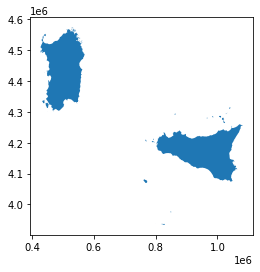

In [14]:
isole.plot()

in a esri shapefile the kind of geometry is always the same, but a geodataframe can accept mixed geometries for each row.

In [15]:
macroregions.geom_type

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
dtype: object

in our case we have a MultiPolygon
the geometries allowed are:

|geometry|images|
|:--|--:|
|POINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/51px-SFA_Point.svg.png)|
|LINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SFA_LineString.svg/51px-SFA_LineString.svg.png)|
|LINEARRING|![](https://github.com/napo/geospatial_course_unitn/blob/master/code/img/linering.png?raw=1)|
|POLYGON|![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/51px-SFA_Polygon.svg.png)![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/SFA_Polygon_with_hole.svg/51px-SFA_Polygon_with_hole.svg.png)
|MULTIPOINT|![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/51px-SFA_MultiPoint.svg.png) 
| MULITLINESTRING|![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/SFA_MultiLineString.svg/51px-SFA_MultiLineString.svg.png)| 
| MULTIPOLYGON |![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/SFA_MultiPolygon_with_hole.svg/51px-SFA_MultiPolygon_with_hole.svg.png)| 
| GEOMETRYCOLLECTION |![](https://github.com/napo/geospatial_course_unitn/blob/master/code/img/geometrycollection.png?raw=1) | 

note: table based on the wikipedia page [WKT](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)


#### and we are ready to look how are the geometries

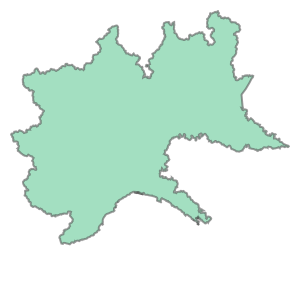

In [16]:
macroregions.geometry[0]

In [17]:
macroregions.DEN_RIP[0]

'Nord-Ovest'

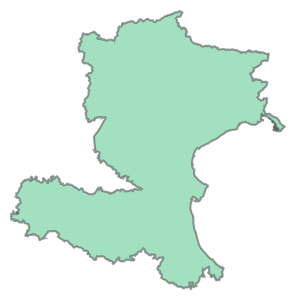

In [18]:
macroregions.geometry[1]

In [19]:
macroregions.DEN_RIP[1]

'Nord-Est'

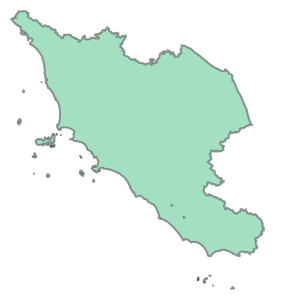

In [20]:
macroregions.geometry[2]

In [21]:
macroregions.DEN_RIP[2]

'Centro'

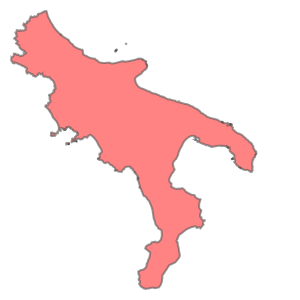

In [22]:
macroregions.geometry[3]

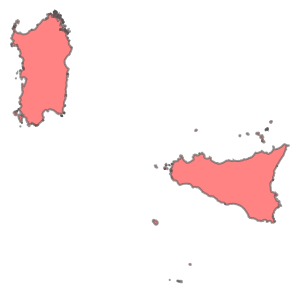

In [23]:
macroregions.geometry[4]

In [24]:
macroregions.DEN_RIP[4]

'Isole'

**the red color, in this case, means a mistake on the geometries!!!**
##### ... and we can check it!

In [25]:
macroregions.geometry.is_valid

0     True
1     True
2     True
3    False
4    False
dtype: bool

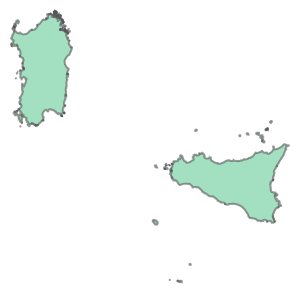

In [26]:
macroregions.geometry[4].buffer(0)

#### Do you want know the centroid of each geometry?

In [27]:
macroregions.geometry.centroid

0     POINT (478138.078 5011451.813)
1     POINT (701966.825 5039900.243)
2     POINT (756711.186 4757688.605)
3    POINT (1061531.039 4529729.154)
4     POINT (736504.559 4300315.212)
dtype: geometry

the output of the geometries is in [well knowtext format (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)

but ... how are expressed the coordinates??
we have to know the Coordinate Reference System (CRS)

## The true size
![](https://github.com/napo/geospatial_course_unitn/blob/master/code/img/truesize.png?raw=1)

https://thetruesize.com/

# SPATIAL PROJECTIONS

**CRS** = *Coordinate Reference System*

## How to convert in latitude/longitude?

In [28]:
macroregions.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## EPSG?
European Petroleum Survey Group  (1986-2005)<br/>
[IOGP](https://www.iogp.org/about-us/) - International Association of Oil & Gas Producers (2005-now)

An important project is the [EPSG registry](http://www.epsg-registry.org/) - the dataset of geodetic parameters

http://epsg.io/32632

![](https://github.com/napo/geospatial_course_unitn/blob/master/code/img/epsg32632.png?raw=1)

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Usgs_map_traverse_mercator.PNG)

![](https://upload.wikimedia.org/wikipedia/commons/e/ed/Utm-zones.jpg)

In [29]:
macroregions.geometry.centroid.to_crs(epsg=4326)

0     POINT (8.72137 45.25622)
1    POINT (11.58437 45.48339)
2    POINT (12.14575 42.92860)
3    POINT (15.64722 40.72675)
4    POINT (11.72414 38.81988)
dtype: geometry

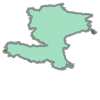

In [30]:
macroregions.to_crs(epsg=4326).geometry[1]

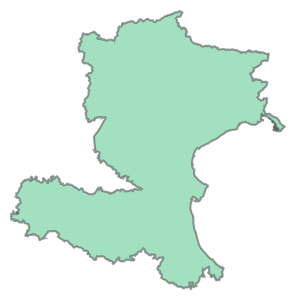

In [31]:
macroregions.geometry[1]


### WGS84 VS ETRS89

|  [WGS84](https://epsg.io/4326)  |  [ETRS89](https://epsg.io/4258) |
|---|---|
|  ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/wgs84_coverage.png?raw=true) | ![](https://github.com/napo/geospatial_course_unitn/blob/master/images/etrs89_coverage.png?raw=true)  

## exploring a .prj file

In [32]:
f=open('RipGeo01012021_g_WGS84.prj','r')

In [33]:
f.read()

'PROJCS["WGS_1984_UTM_Zone_32N",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",9.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]'

... like here
http://epsg.io/32632.wkt

http://epsg.io/32632.prettywkt



<div class="alert alert-info" style="font-size:120%">
<b>REMEMBER</b>: <br>

<ul>
  <li>A `GeoDataFrame` allows to perform typical tabular data analysis together with spatial operations</li>
  <li>A `GeoDataFrame` (or *Feature Collection*) consists of:
   <ul>
    <li>**Geometries** or **features**: the spatial objects</li>
    <li>**Attributes** or **properties**: columns with information about each spatial object</li>
   </ul>
  </li>
</ul>
</div>

## save the geodataframe


In [34]:
macroregions.to_crs(epsg=4326).to_file('macro_regions.geojson',driver='GeoJSON')

<div class="alert alert-info" style="font-size:120%">
<b>OUTPUT FORMATS</b>: <br>

<ul>
  <li>the library *fiona* offers different kind of output formats
  </li>
</ul>
</div>

In [35]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'rw',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

## download file from colab
... otherwise you can simply load the file from your filesystem where you hosted this script :)

In [36]:
from google.colab import files
files.download('macro_regions.geojson') 

ModuleNotFoundError: No module named 'google.colab'

... and visualize it on http://geojson.io
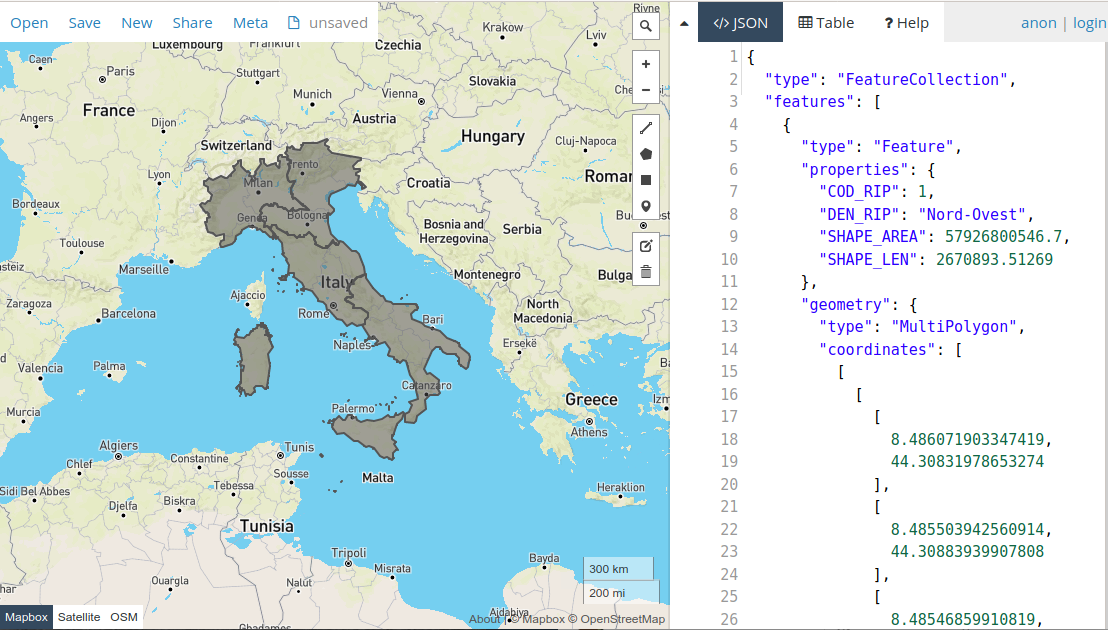



---

## Exercise

1. load the shapefile of ISTAT with the information of the provinces
  - filter it for an italian provice at your choice (eg. Trento)
  - plot it
2. load the shapefile of ISTAT with the informations of the muncipalities
  - identify the cities of the province selected with the biggest and smallest area
  - extract all the centroids of the areas expressed in WGS84
  - select all the muncipalities of the Province of Trento
  - extract a representative point for the area of each municipality converted in WGS84<br/>suggestion: *.representative_point()*
  - save the points in a GeoJSON file
  - calculate the distance on the geodentic between the municipality with the big area and smallest area by using the centroid
3. download the shapefile of the [lakes and bodies of water](https://github.com/napo/geospatial_course_unitn/raw/master/data/lakes_bodies_of_water_trentino.zip) of Trentino - projection Monte Mario zone 1
  - plot the geometries where Fktuso is "02"
  - convert in WGS84 and create a geojson